# <div align="center"> [AIRBNB] Market Analysis in Dublin
<img src="airbnb-a8707ed9_original.webp" style="width: 600px;"/>

##  __[SOURCE: Stratascratch](https://www.stratascratch.com/)__
## <i>Problem Statement </i>

<b>AIRBNB</b> wants to understand

* What guests are searching in Dublin
* Which inquiries do hosts tend to accept
* What gaps exist between guest demand and host supply
* Any other information that deepens the understanding of the data
The goal is to analyze, understand, visualize, and communicate the demand/supply of the market in Dublin

## Data Exploration

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

contacts_file=('contacts.tsv')
contact=pd.read_csv(contacts_file, sep='\t')
searches_file=('searches.tsv')
search=pd.read_csv(searches_file, sep='\t')

In [28]:
contact.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


In [29]:
search.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


In [30]:
#Find % of null values in datasets 
print('Contacts')
print(contact.isna().sum()/len(contact)*100,'\n')
print('Searches')
print(search.isna().sum()/len(search)*100,'\n')

Contacts
id_guest           0.000000
id_host            0.000000
id_listing         0.000000
ts_contact_at      0.000000
ts_reply_at        7.720823
ts_accepted_at    53.636712
ts_booking_at     72.210150
ds_checkin         0.000000
ds_checkout        0.000000
n_guests           0.000000
n_messages         0.000000
dtype: float64 

Searches
ds                       0.000000
id_user                  0.000000
ds_checkin              33.156113
ds_checkout             33.156113
n_searches               0.000000
n_nights                33.156113
n_guests_min             0.000000
n_guests_max             0.000000
origin_country           0.000000
filter_price_min        62.722109
filter_price_max        62.722109
filter_room_types       54.694015
filter_neighborhoods    96.233595
dtype: float64 



The neighborhood column in searches has 96.2336% of null values. This could lead to inaccurate assumptions about the demand from people. When looking through the column, 'City Centre' was a common choice, so this should be investigated further with more data.

## searches Dataset

In [31]:
#Drop filter_neighborhoods column

searches = search.drop(columns=['filter_neighborhoods'])

In [34]:
#Manipulation of searches dataset

#Convert date column to datetime data type for easier analysis
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

#How soon they want the room
searches['length_preperation'] = searches['ds_checkin'] - searches['ds']

In [35]:
#Describe searches dataset

#Helps understand the dataset and its distribution of values within columns better
display(searches.describe())

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preperation
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00


This shows that the number of guests is usually 1 or 2. This can be understood since even at 75% the n_guests_min and n_guests_max are 2 and at 25% is 1. Leads to believe that smaller accommodations are preferred.

In [36]:
#Calculate skewness in searches dataset

display(searches.skew(axis = 0, numeric_only = True, skipna = True))

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

All numeric columns have a Fisher-Pearson coefficient value greater than 1. This results in a positive skewness. With more time, I would have used a transformation method such as log transformation to reduce the skewness

## Distributions

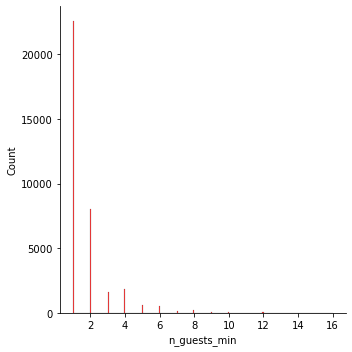

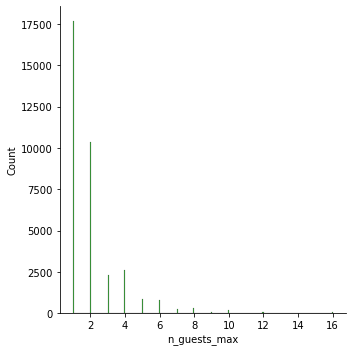

In [39]:
#Distribution plot of n_guests_min and n_guests_max
sns.displot(searches, x = 'n_guests_min', color = 'red')
sns.displot(searches, x = 'n_guests_max', color = 'green')
plt.show()

Both have similar distributions with 1 being the most popular option and 2 being the next popular option

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

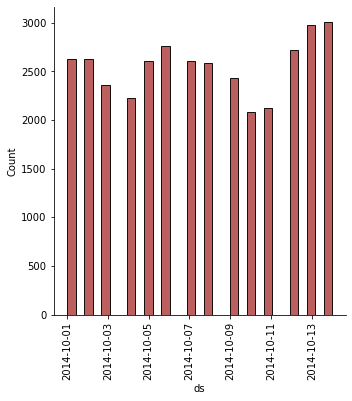

In [40]:
#When were searches conducted

ax = sns.displot(searches, x = 'ds', color = 'brown')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

Noticed all date searches were between October 1st to October 14th. No major variation in when search was conducted between these dates

In [41]:
#Percentage of dataset with a filter_price_max above 600

print(len(searches[searches['filter_price_max'] > 600])/len(searches['filter_price_max'])*100, '%')

5.311022189887232 %


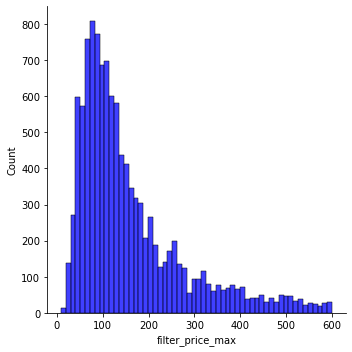

In [42]:
#Distribution of filter_price_max of searches

#Removing the set upper limit
searches_maxprice_removed = searches[searches['filter_price_max'] <= 600]

#Distribution plot of filter_price_max column
sns.displot(x=searches_maxprice_removed["filter_price_max"], color = 'blue')
plt.show()

Filter_price_max was chosen instead of filter_price_min due to the min usually being set at $0

To further help better visualize the trend we set the filter price max as less or equal to 600. 600 was chosen as the limit since only 14.25% of the dataset has values greater than 600

9.396423874415872 % 



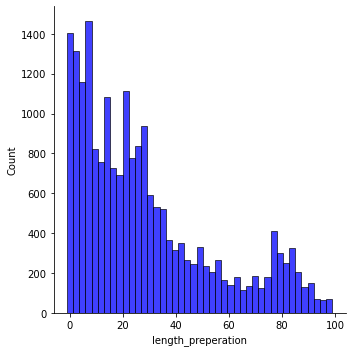

In [45]:
#Distribution of length_preperation of searches

#Percentage of dataset beyond 100 days
distribution = searches["length_preperation"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100])/len(distribution)*100, '% \n')

#Remove values beyond 100 days
distribution = distribution[distribution < 100]

#Distribution plot of length_preperation column
sns.displot(x=distribution, color = 'blue')
plt.show()

100 days was chosen as the limit since only 14.06% of the dataset exists beyond that

4.737387021854101 % 



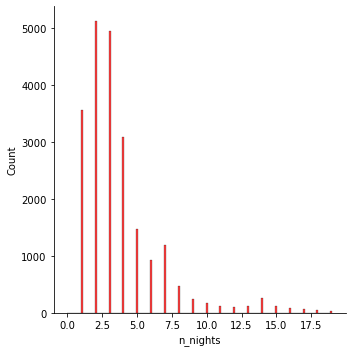

In [46]:
#Distribution of n_nights of searches

#Percentage of dataset beyond 20 nights
print(len(searches[searches['n_nights'] > 20])/len(searches['n_nights'])*100, '% \n')

#Remove n_nights beyond 20 days
searches_within_twenty = searches[searches['n_nights'] < 20]

#Distribution plot of length_preperation column
sns.displot(searches_within_twenty, x='n_nights', color = 'red')
plt.show()

Removing n_nights beyond 20 days since only 7.3% of the dataset exists beyond 20 days

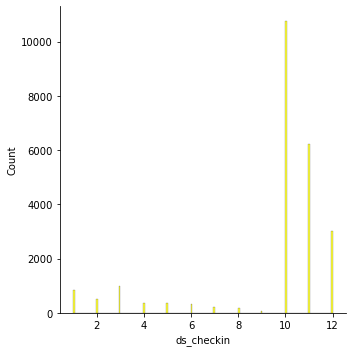

In [47]:
#Distribution of months of ds_checkin of searches

checkin_month = pd.DatetimeIndex(searches['ds_checkin']).month

#Distribution plot of length_preperation column
sns.displot(checkin_month, color = 'yellow')
plt.show()

Used only the check-in month, cause checkout is usually within 5/6 days. The mean of n_nights after removing the upper outlier limit is 5.6, so assumed 5 or 6 days after the check-in date people usually checkout

In [48]:
#Types of rooms searched for

searches['filter_room_types'].unique()[0:15] #Display first 15 unique values

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

Most of the room types requested were entire home/apt and private rooms sometimes shared rooms. If given more time, I would have cleaned this column since most filter values are repeated within the same cell. On the Airbnb website, there are only 4 values in the type of place:

Entire Place
Private Room
Hotel Room
Shared Room
So searching how often these 4 strings occur would be how I go about it

In [49]:
#Find top 15 countries where searches originate from

#Group by origin country and finding the count of each country
search_origin = searches.groupby("origin_country").agg({'origin_country' : 'count'})
search_origin.columns = ['count']

search_origin = search_origin.sort_values('count', ascending = False) #Sort count in descending order
search_origin.nlargest(15, 'count') #Find the 15 largest values

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


## contacts dataset

In [51]:
#Manipulation of contacts dataset

#Convert date columns to datetime data type 
contact['ts_contact_at'] = pd.to_datetime(contact['ts_contact_at'])
contact['ts_reply_at'] = pd.to_datetime(contact['ts_reply_at'])
contact['ts_accepted_at'] = pd.to_datetime(contact['ts_accepted_at'])
contact['ts_booking_at'] = pd.to_datetime(contact['ts_booking_at'])
contact['ds_checkin'] = pd.to_datetime(contact['ds_checkin'])
contact['ds_checkout'] = pd.to_datetime(contact['ds_checkout'])
contact['accepted'] = np.where(np.isnan(contact['ts_accepted_at']), False, True)

contact['length_stay'] = contact['ds_checkout'] - contact['ds_checkin']

#Understand dataset
display(contact.dtypes)
display(contact.describe())

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

,n_guests,n_messages,length_stay
count,7823.000000,7823.000000,7823
mean,2.422600,6.319954,5 days 19:25:32.864629937
std,1.617347,6.472827,14 days 23:45:24.447710564
min,1.000000,1.000000,1 days 00:00:00
25%,1.000000,2.000000,2 days 00:00:00
50%,2.000000,4.000000,3 days 00:00:00
75%,3.000000,8.000000,5 days 00:00:00
max,16.000000,102.000000,334 days 00:00:00


In [53]:
#Calculate skewness in contacts dataset

display(contact.skew(axis = 0, numeric_only = True, skipna = True))

n_guests      2.441468
n_messages    3.696440
accepted      0.145883
dtype: float64

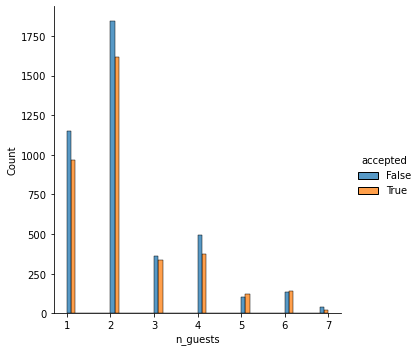

In [54]:
#Number of guests stayed

contact_less8 = contact[contact['n_guests'] < 8]
sns.displot(contact_less8, x = 'n_guests', hue = 'accepted', multiple="dodge")
plt.show()

Choosing less than 8 guests, since only 1.46% (114 values) of the contacts dataset has 8 or more guests. To better visualize the majority distribution we removed rows with 8 or more guests.

2 guests is the most popular option to book, but 1 guest is the most popularly searched option. This leads me to believe there is a lack of supply of viable single guest rooms.

In [56]:
#Conversion rate from accepting to booking

contact['ts_booking_at'].count()/contact['ts_accepted_at'].count()

0.5993934381031155

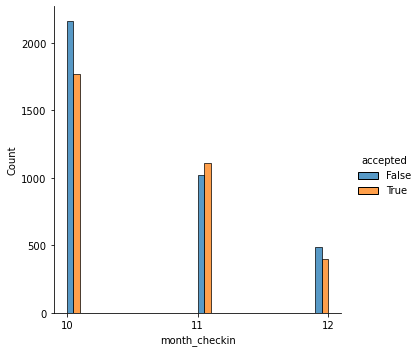

In [58]:
#Timeframe of when guests or accepted vs rejected

contact['month_checkin'] = contact['ds_checkin'].dt.month #Extract month from checkin date
contact_checkin = contact[contact['month_checkin'] > 9] #Use only peak season months (Oct, Nov, Dec)

#Distribution of checkin among October, November, and December and split by acceptance
sns.displot(contact_checkin, x='month_checkin', hue = 'accepted', multiple="dodge")
plt.xticks([10, 11, 12])
plt.show()

In [59]:
#Merge datasets for more analysis

merged_datasets = contact.merge(searches, left_on='id_guest', right_on='id_user')

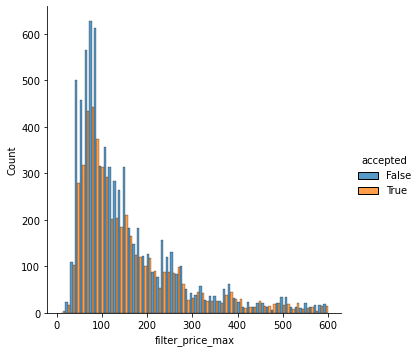

In [60]:
#Check difference between prices searched between accepted/rejected applicants

merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

sns.displot(merged_pricemax_filter, x="filter_price_max", hue="accepted", multiple="dodge")
plt.show()

To further help better visualize the trend we set the filter price max as less or equal to 600. 600 was chosen as the limit since only 14.25% of the dataset has values greater than 600.

As seen, more people are rejected compared than accepted with an average acceptance rate of 43%

In [61]:
#Classify dataset based on filter_price_max

def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'
    
    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'

    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'
    
    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'

    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'
    
    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'
    
    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby('classification_max_price').agg({'accepted': 'mean'})

,accepted
classification_max_price,
0-100,0.411160
100-200,0.430308
200-300,0.431149
300-400,0.450488
400-500,0.485549
500-600,0.422297
600+,0.433122


Based on this table, it can be seen that regardless of max_filter_price, people are rejected at similar rates

In [62]:
#Find the acceptance rate by country

dataset_country = merged_datasets[['origin_country', 'accepted']]

#Find acceptance count by country and accepted
accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

#Find acceptance count by country
country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

#Merge datasets for easier manipulation 
acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted']) #Merge accepted count
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country']) #Merge total country count
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] #100 is used so there is a good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

#Divide count_accepted column by count_country column to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
72,AT,True,83,239,0.347280
54,RU,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729
